In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dsc_thermo import heat_flow as hf
from dsc_thermo import thermo
from dsc_thermo.molar_mass import molar_mass

## Quickstart

The easiest way to use the code is to create a subclass of thermo.Material for the material you are measuring:

In [2]:
#Class for just the glass and crystal phases of a glass former
class Glass_And_Crystal(thermo.Material):
    Cp_fit_func = {"glass":None, "crystal":thermo.cp_crystal}

Then you can list the measurement runs you have done in a file formatted like vit105_heatflow.txt and run thermo.gen_material()

In [30]:
#this takes a while to load. Blame np.genfromtxt!
mu_vit105 = molar_mass("Zr52.5Cu17.9Ni14.6Al10Ti5")
vit105 = thermo.gen_material("vit105_heatflow.txt", mu_vit105, Glass_And_Crystal, Tf=1085, T_max=500)

Now we have eveything!

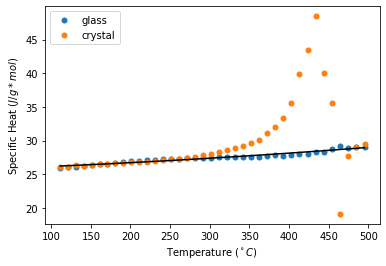

In [33]:
#Measured Cp vs. T
plt.plot(vit105.T_measured["crystal"], vit105.Cp_measured["crystal"], ".", ms=10, label="glass")
plt.plot(vit105.T_measured["glass"], vit105.Cp_measured["glass"], ".", ms=10, label="crystal")
plt.legend(loc="upper left")

#best fit Cp for crystal data
T = np.linspace(min(vit105.T_measured["crystal"])+273.15, max(vit105.T_measured["crystal"])+273.15)
plt.plot(T-273.15, vit105.Cp["crystal"](T), "k", label="fit") #fit Cp is in K
plt.xlabel("Temperature ($^\circ C$)")
plt.ylabel("Specific Heat ($J/g*mol$)")
plt.show()

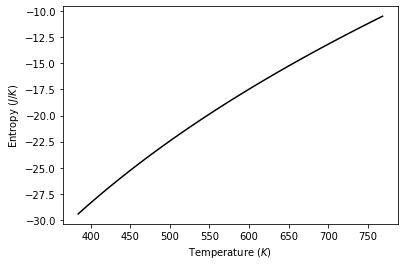

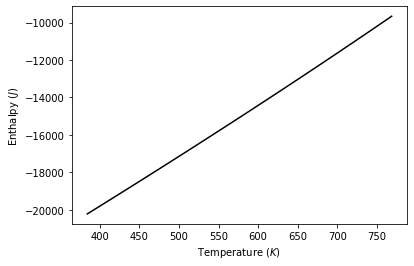

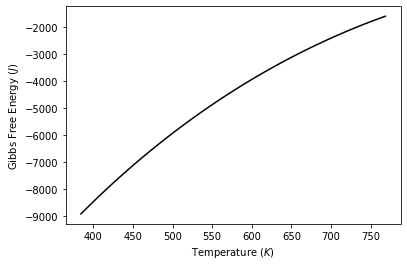

In [36]:
#Calculated S, H and G for vit105 crystal
#Note that these are only up to a constant, since we didn't specify the enthalpy of formation
plt.plot(T, vit105.entropy["crystal"](T), "k", label="fit") 
plt.xlabel("Temperature ($K$)")
plt.ylabel("Entropy ($J/K$)")
plt.show()

plt.plot(T, vit105.enthalpy["crystal"](T), "k", label="fit") 
plt.xlabel("Temperature ($K$)")
plt.ylabel("Enthalpy ($J$)")
plt.show()

plt.plot(T, vit105.gibbs["crystal"](T), "k", label="fit") 
plt.xlabel("Temperature ($K$)")
plt.ylabel("Gibbs Free Energy ($J$)")
plt.show()